# **Overall WorkFlow**

### 1. Preprocessing Before Modeling
### 2. Hyperparameter Tuning - Bayesian Optimization
### 3. Voting 
### 4. CrossValidation for Evaluation of results
### 5. Plot Diagram
### 6. Deep Learning
### 7. Hyperparameter Tuning - Bayesian Optimization

# ***Basic***

# ***pip install***

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=72742e91124f2171b8acf936361c98e49dc953264851900471728f4be4ffd2dc
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 85 kB/s 


# ***library***

In [ ]:
# basics
from IPython import get_ipython
get_ipython().magic('reset -sf')
import pandas as pd
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from glob import glob
import os
plt.style.use('ggplot')
from bayes_opt import BayesianOptimization
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# preprocess
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import PowerTransformer

# Classifier Libraries
import collections
from lightgbm import LGBMClassifier

# preprocess
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn import under_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import collections
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import catboost as cgb
from functools import partial

#keras
import tensorflow.keras.initializers
import tensorflow.keras
from tensorflow import keras
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import statistics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling

# imbalanced
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced

# evalue
from numpy import mean
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import average_precision_score 
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import SCORERS
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

# warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!ls 'drive/My Drive'

Mounted at /content/drive
'Colab Notebooks'   data   NEW	 prop


In [ ]:
data = pd.read_csv('/content/drive/My Drive/data/creditcard.csv')
print("Full dataset has",data.shape[0], "rows and", data.shape[1], "columns")

Full dataset has 284807 rows and 31 columns


#relu , sigmoid

In [ ]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [ ]:
def relu(x):
    return np.maximum(x, 0., None)

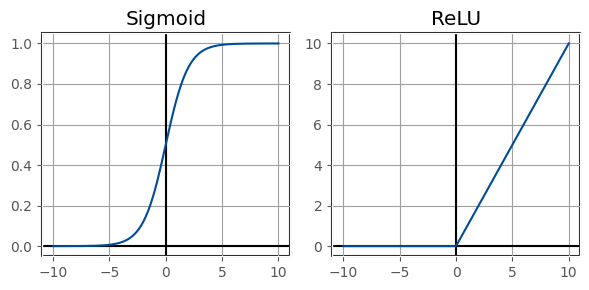

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(6,3),dpi=100)
x = np.linspace(-10,10,200)

for ax in axes.flat:
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    #ax.grid(True)
#axes[0].set_xlim([-10, 10])
axes[0].plot(x, sigmoid(x), color ='#004c99')
axes[0].patch.set_facecolor('white')
axes[0].set_title('Sigmoid')
axes[0].grid(True, color = '#A0A0A0')
axes[0].patch.set_edgecolor('black')  

axes[0].patch.set_linewidth('1.5') 
axes[1].plot(x, relu(x), color ='#004c99')
axes[1].patch.set_facecolor('white')
axes[1].grid(True, color = '#A0A0A0')
#axes[1].set_xlim([-10, 10])
axes[1].set_title('ReLU', color ='black')
axes[1].patch.set_edgecolor('#000000')  

axes[1].patch.set_linewidth('1.5')
#plt.savefig('sig-vs-relu.png')
plt.show()

# ***info***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334

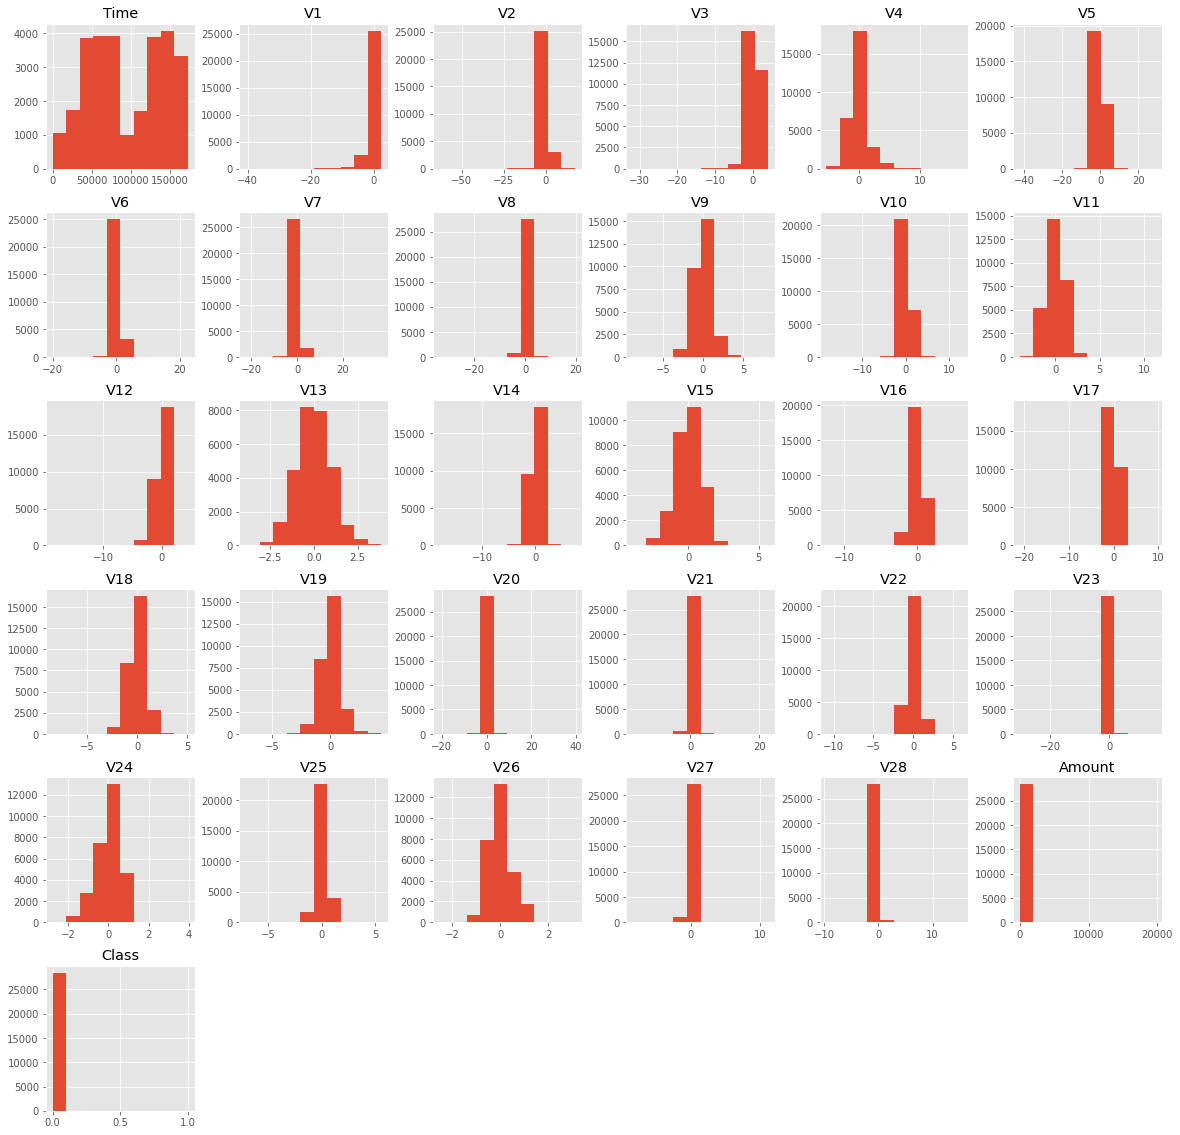

In [ ]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

# ***PreProcess***

# ***Feature Extraction***

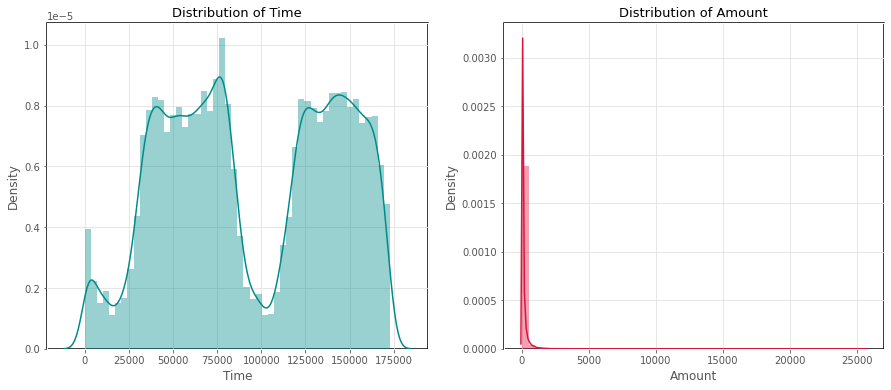

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(data['Time'], ax=ax1, color='#008B8B')
ax2 = sns.distplot(data['Amount'], ax=ax2, color='#DC143C')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)
ax1.patch.set_facecolor('white')
ax1.grid(True, color = '#E0E0E0')
ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('1.5') 
ax2.patch.set_facecolor('white')
ax2.grid(True, color = '#E0E0E0')
ax2.patch.set_edgecolor('black')  
ax2.patch.set_linewidth('1.5') 

In [ ]:
#data['day']=(data['Time']//86400).astype('int')
data['hour']=((data['Time']//3600)//2.).astype('int')
#data['minute']=((data['Time']%3600.)//60).astype('int')
#data['second']=((data['Time']%3600)%60).astype('int')
data['second']=(data['Time']%3600).astype('int')
data.drop('Time',axis=1,inplace=True)
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,second
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,2


# ***Removing duplicate data***

In [ ]:
print("Duplicate vs Non duplicate counts :")
print(data.duplicated().value_counts())

Duplicate vs Non duplicate counts :
False    283726
True       1081
dtype: int64


In [ ]:
# Removing the Duplicate Values
data.drop_duplicates(inplace = True)

In [ ]:
# Check for duplicate data if they exist 
print(data.duplicated().value_counts())

# Reset the index
data.reset_index(drop = True , inplace = True)

False    283726
dtype: int64


# ***count Fraud and Valid***

In [ ]:
print(data['Class'].value_counts())
print('\n')
print(data['Class'].value_counts(normalize=True))

0    283253
1       473
Name: Class, dtype: int64


0    0.998333
1    0.001667
Name: Class, dtype: float64


In [ ]:
classes=data['Class'].value_counts()
Valid=round(classes[0]/data['Class'].count(), 4)
Fraud=round(classes[1]/data['Class'].count(), 4)

print('Fradulent transactions (Label 1)     : {0} % ({1})'.format(Fraud, classes[1]))
print('Genioun transactions (Label 0) : {0} % ({1})'.format(Valid, classes[0]))

Fradulent transactions (Label 1)     : 0.0017 % (473)
Genioun transactions (Label 0) : 0.9983 % (283253)


[Text(0, 0, '0'), Text(0, 0, '1')]

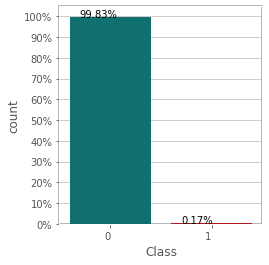

In [ ]:
# Create plots for the number and percentage of fraudulent vs Valid transcations
plt.figure(figsize=(8,4))
plt.subplot(121)
#colors = ['#008080','crimson']
#colors = ['crimson','#008080']
colors = ['#008080','#CC0000']
Class = data["Class"]
total = len(Class)*1.
ax=sns.countplot(x="Class", data=data, palette=colors)

for p in ax.patches:
  ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
  ax.patch.set_facecolor('white')
  ax.yaxis.grid(True, color = '#C0C0C0') 
  ax.patch.set_edgecolor('#A0A0A0')  
  ax.patch.set_linewidth('1.5')
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.0f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), ha="right")




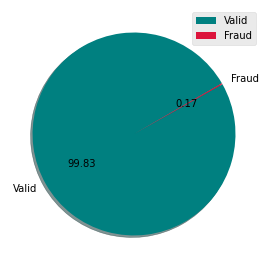

In [ ]:
# Create plots for the number and percentage of fraudulent vs Valid transcations
plt.figure(figsize=(10,5))

plt.subplot(122)
#plt.title('Percentage of each Class', fontsize=14)
plt.pie(x=[Valid,Fraud],labels=['Valid','Fraud'],
        autopct='%.2f', colors=['#008080','crimson'], startangle=30, shadow=True)
plt.legend(loc='best')

plt.show()

In [ ]:
# estimate a value for the scale_pos_weight
from sklearn.datasets import make_classification
from collections import Counter
counter = Counter(y)
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 598.844


# X,Y

In [ ]:
df = pd.DataFrame(data, columns=['V10' ,'V11' ,'V12' ,'V14' ,'V16' ,'V17', 'Class'])

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

# ***Feature Selection***

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

Feature 0 : 0.0019
Feature 1 : 0.0031
Feature 2 : 0.0047
Feature 3 : 0.0048
Feature 4 : 0.0022
Feature 5 : 0.002
Feature 6 : 0.0037
Feature 7 : 0.0015
Feature 8 : 0.0041
Feature 9 : 0.0074
Feature 10 : 0.0066
Feature 11 : 0.0074
Feature 12 : 0.0002
Feature 13 : 0.0079
Feature 14 : 0.0
Feature 15 : 0.0058
Feature 16 : 0.0079
Feature 17 : 0.004
Feature 18 : 0.001
Feature 19 : 0.0009
Feature 20 : 0.0022
Feature 21 : 0.0002
Feature 22 : 0.0004
Feature 23 : 0.0004
Feature 24 : 0.0002
Feature 25 : 0.0001
Feature 26 : 0.0022
Feature 27 : 0.0016
Feature 28 : 0.0014
Feature 29 : 0.0033
Feature 30 : 0.0


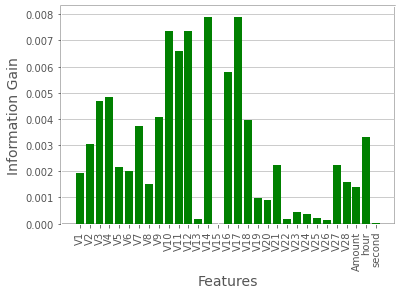

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)
rob_scaler = RobustScaler()
X_test = rob_scaler.fit_transform(X_test)
X_test = rob_scaler.fit_transform(X_test)

from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)
infogain_classif.fit(X_train, y_train)
#colors = ['crimson','#008080']
# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],4)}')

# plot the scores
plt.bar([X_train.columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_ ,color=['green'])
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,7)
#plt.title('Feature Selection', fontsize=14)
ax = plt.gca()
ax.patch.set_facecolor('white')
ax.yaxis.grid(True, color = '#C0C0C0') 
ax.patch.set_edgecolor('#A0A0A0')  
ax.patch.set_linewidth('1.5')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Information Gain',fontsize=14)
plt.show()

In [ ]:
#set of best features set
mask=infogain_classif.get_support()
not_mask=np.logical_not(mask)

all_features=np.array(list(X))

best_features=all_features[mask]
bad_features=all_features[~mask]#not_mask
print('Best Features :',best_features)
print('Bad Features :',bad_features)

Best Features : ['V10' 'V11' 'V12' 'V14' 'V16' 'V17']
Bad Features : ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V13' 'V15' 'V18' 'V19'
 'V20' 'V21' 'V22' 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount' 'hour'
 'minute' 'second']


In [ ]:
df = pd.DataFrame(data, columns=['V10' ,'V11' ,'V12' ,'V14' ,'V16' ,'V17', 'Class'])

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

# ***x,y train, test df***

In [ ]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)
#train, test = train_test_split(df, test_size = 0.2, shuffle=True, stratify=df['Class'])
print("Train Shape: {} \nTest Shape: {}".format(train.shape, test.shape))

Train Shape: (226980, 7) 
Test Shape: (56746, 7)


##x,y train

In [ ]:
X_train  = train.drop('Class', axis=1).values
y_train  = train['Class'].values
print('before sampling: \nX_train  shape: {} \ny_train shape: {}'.format(X_train.shape, y_train.shape))

before sampling: 
X_train  shape: (226980, 6) 
y_train shape: (226980,)


##X, y test

In [ ]:
X_test  = test.drop('Class', axis=1)
y_test  = test['Class']
print('\nX_test  shape: {} \ny_test shape: {}'.format(X_test.shape, y_test.shape))


X_test  shape: (56746, 6) 
y_test shape: (56746,)


In [ ]:
X_test  = test
y_test  = test['Class']

In [ ]:
X_test_Fraud = X_test[X_test.Class==1]
X_test_Valid = X_test[X_test.Class==0]
y_test_Fraud = y_test[X_test.Class==1]
y_test_Valid = y_test[X_test.Class==0] 

X_test = X_test.drop('Class', axis=1).values
y_test = y_test.values  

X_test_Valid =X_test_Valid.drop('Class', axis=1).values
y_test_Valid = y_test_Valid.values

X_test_Fraud = X_test_Fraud.drop('Class', axis=1).values
y_test_Fraud = y_test_Fraud.values  

In [ ]:
print('X_test  shape: {} \ny_test shape: {}'.format(X_test.shape, y_test.shape))
print('X_test_Fraud  shape: {} \ny_test_Fraud shape: {}'.format(X_test_Fraud.shape, y_test_Fraud.shape))
print('X_test_Valid  shape: {} \ny_test_Valid shape: {}'.format(X_test_Valid.shape, y_test_Valid.shape))

X_test  shape: (56746, 6) 
y_test shape: (56746,)
X_test_Fraud  shape: (90, 6) 
y_test_Fraud shape: (90,)
X_test_Valid  shape: (56656, 6) 
y_test_Valid shape: (56656,)


# ***Bayesian Optimization***

##*LGBM*

In [ ]:
# create purpose function
def lgbm_cv(learning_rate, max_depth, num_leaves):
    model = LGBMClassifier(learning_rate = learning_rate,
                                num_leaves = int(round(num_leaves)),
                                max_depth = int(round(max_depth)), 
                                class_weight = 'balanced'
                               )
    
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring= 'neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params = {'learning_rate': (0.001, 0.2),
           'max_depth': (-1, 8),
           'num_leaves': (2, 250)
          }

from bayes_opt import BayesianOptimization
lgbmBO = BayesianOptimization(lgbm_cv, params)

start = time.time()
lgbmBO.maximize(init_points=5, n_iter = 8, acq='ei')

print('It takes %s minutes' % ((time.time() - start)/60))
params_lgbm = lgbmBO.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round(params_lgbm['num_leaves'])
print(params_lgbm)

|   iter    |  target   | learni... | max_depth | num_le... |
-------------------------------------------------------------
|  1        | -0.0385   |  0.05394  |  5.859    |  85.04    |
|  2        | -0.1525   |  0.02298  |  3.542    |  121.4    |
|  3        | -0.0105   |  0.1213   |  6.235    |  94.25    |
|  4        | -0.005794 |  0.18     | -0.6813   |  45.42    |
|  5        | -0.005467 |  0.109    | -0.5032   |  232.2    |
|  6        | -0.0202   |  0.03453  | -0.3525   |  230.8    |
|  7        | -0.007284 |  0.2      | -1.0      |  236.9    |
|  8        | -0.01551  |  0.2      |  3.962    |  235.1    |
|  9        | -0.007212 |  0.08437  | -0.6308   |  38.17    |
|  10       | -0.006042 |  0.1781   |  6.229    |  42.25    |
|  11       | -0.008241 |  0.1386   |  6.198    |  51.09    |
|  12       | -0.005409 |  0.182    |  7.661    |  32.61    |
|  13       | -0.006229 |  0.1313   |  0.1856   |  27.54    |
It takes 6.197216959794362 minutes
{'learning_rate': 0.181955773054044

##*XGBoost*

In [ ]:
# estimate a value for the scale_pos_weight xgboost hyperparameter
from sklearn.datasets import make_classification
from collections import Counter
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 598.844


In [ ]:
##neg log loss
# create purpose function
def xgb_cv(learning_rate, max_depth, n_estimators):
    model = XGBClassifier(learning_rate = learning_rate,
                                max_depth = int(round(max_depth)),
                                n_estimators = int(round(n_estimators)),
                                scale_pos_weight = 592
                          )
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring='neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params={'learning_rate': (0.001, 0.2),
           'max_depth': (3, 10),
           'n_estimators': (50, 100)
          }

from bayes_opt import BayesianOptimization
xgbBO = BayesianOptimization(xgb_cv, params)

start = time.time()
xgbBO.maximize(init_points=5, n_iter = 8, acq='ei')

print('It takes %s minutes' % ((time.time() - start)/60))

params_xgb = xgbBO.max['params']
params_xgb['max_depth'] = round(params_xgb['max_depth'])
params_xgb['n_estimators'] = round(params_xgb['n_estimators'])
params_xgb['learning_rate'] = round((params_xgb['learning_rate']),4)
print(params_xgb)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  1        | -0.008813 |  0.1878   |  5.997    |  57.67    |
|  2        | -0.003529 |  0.1109   |  9.003    |  98.13    |
|  3        | -0.0102   |  0.1625   |  5.583    |  60.01    |
|  4        | -0.02645  |  0.04697  |  8.089    |  76.05    |
|  5        | -0.008916 |  0.1774   |  5.78     |  59.02    |
|  6        | -0.005466 |  0.2      |  4.978    |  100.0    |
|  7        | -0.6169   |  0.001    |  6.783    |  94.32    |
|  8        | -0.003544 |  0.1422   |  9.674    |  99.97    |
|  9        | -0.04344  |  0.04445  |  9.847    |  59.45    |
|  10       | -0.01953  |  0.04035  |  7.565    |  99.98    |
|  11       | -0.1758   |  0.03584  |  3.004    |  54.28    |
|  12       | -0.004179 |  0.2      |  6.86     |  64.88    |
|  13       | -0.09507  |  0.07954  |  3.02     |  64.64    |
It takes 31.05252418915431 minutes
{'learning_rate': 0.1109, 'max_dept

##*CatBoost*

In [ ]:
from catboost import CatBoostClassifier
import random
import numpy as np
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train, verbose=False)
cbc.get_all_params()

In [ ]:
# create purpose function
import catboost as cgb
from bayes_opt import BayesianOptimization
def cat_cv(learning_rate, depth, iterations):
    model = CatBoostClassifier(learning_rate = learning_rate,
                                depth = int(round(depth)), 
                                iterations = int(round(iterations)),
                                class_weights = {0:1, 1:592},verbose=False
                                )
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train, y_train,verbose=False, cv=cv, scoring='neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params={'learning_rate': (0.001, 0.2),
        'depth' : (6, 16),
        'iterations': (50, 200)
          }

from bayes_opt import BayesianOptimization
catBO = BayesianOptimization(cat_cv, params)
start = time.time()
catBO.maximize(init_points=4, n_iter = 8, acq='ei')

print('It takes %s minutes' % ((time.time() - start)/60))

params_cat = catBO.max['params']
params_cat['depth'] = round(params_cat['depth'])
params_cat['iterations'] = round(params_cat['iterations'])
print(params_cat)

|   iter    |  target   |   depth   | iterat... | learni... |
-------------------------------------------------------------
|  1        | -0.1233   |  7.872    |  112.0    |  0.02614  |
|  2        | -0.01612  |  15.35    |  58.46    |  0.1311   |
|  3        | -0.008942 |  10.66    |  90.54    |  0.1884   |
|  4        | -0.01208  |  10.78    |  181.3    |  0.06847  |
|  5        | -0.008999 |  10.78    |  89.55    |  0.1908   |
|  6        | -0.008773 |  12.93    |  194.5    |  0.07313  |
|  7        | -0.6439   |  6.0      |  70.56    |  0.001    |
|  8        | -0.0109   |  16.0     |  51.12    |  0.2      |
|  9        | -0.04287  |  6.231    |  189.4    |  0.07266  |
|  10       | -0.006239 |  16.0     |  187.1    |  0.2      |
|  11       | -0.006342 |  16.0     |  169.6    |  0.2      |
|  12       | -0.5859   |  6.0      |  166.3    |  0.001    |
It takes 90.66689343452454 minutes
{'depth': 16, 'iterations': 187, 'learning_rate': 0.2}


In [ ]:
model = CatBoostClassifier(class_weights= {0:1, 1:592}, learning_rate=0.2, iterations=187, depth= 16 ,verbose=False)
cv_results(model, output_type='dict')

{'accuracy': 0.9988862496456073,
 'f1': 0.7201913444321979,
 'precision': 0.6633298083891769,
 'recall': 0.8096304591265397,
 'roc_auc': 0.9522518953422259}

In [ ]:
model = CatBoostClassifier(class_weights= {0:1, 1:592}, learning_rate=0.2, iterations=187, depth= 16 ,verbose=False )

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# summary  
print('\n')
print('--------- Summary ------------')
print('\n')
print('accuracy: {}'.format(round(accuracy_score(y_test, y_pred),4)))
print('Precision: {}'.format(round(precision_score(y_test, y_pred),4)))
print('f1: {}'.format(round(f1_score(y_test, y_pred),4)))
print('Recall: {}'.format(round(recall_score(y_test, y_pred),4)))
print('AUC: {}'.format(round(roc_auc_score(y_test, y_pred),4)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_pred),4)))
print('Precision-Recallproba: {}'.format(round(average_precision_score(y_test, y_proba),4)))
print('MCC: {}'.format((matthews_corrcoef(y_test, y_pred))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.67      0.82      0.74        95

    accuracy                           1.00     56746
   macro avg       0.84      0.91      0.87     56746
weighted avg       1.00      1.00      1.00     56746

[[56613    38]
 [   17    78]]


--------- Summary ------------


accuracy: 0.999
Precision: 0.6724
f1: 0.7393
Recall: 0.8211
AUC: 0.9102
Precision-Recall: 0.5524
Precision-Recallproba: 0.795
MCC: 0.7425562624804878


# ***cv strifiedkfold***

In [ ]:
from sklearn.utils import shuffle
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
X = df.drop('Class', axis = 1)
y = df['Class']
def cv_results(model, output_type = 'result'):
  # Create the pipeline

  '''pipeline = make_pipeline(
      SMOTE(sampling_strategy='minority', k_neighbors = 5, n_jobs=-1, random_state = 42),
      model
      )
  pipeline = make_pipeline(
      RandomUnderSampler(sampling_strategy='majority', random_state = 42),
      model
      )'''

    # Cross validation with sklearn
  sk_fold = StratifiedKFold(n_splits=5)

  scoring = {'f1': 'f1',
             'precision': 'precision',
             'recall': 'recall',
             'accuracy': 'accuracy',
             'roc_auc': 'roc_auc'
             }

  #cv_scores = cross_validate(pipeline, X, y, scoring = scoring, cv = sk_fold)
  cv_scores = cross_validate(model, X, y, scoring = scoring, cv = sk_fold)
  
  f1 = cv_scores['test_f1']
  precision = cv_scores['test_precision']
  recall = cv_scores['test_recall']
  accuracy = cv_scores['test_accuracy']
  roc_auc = cv_scores['test_roc_auc']
  # Average the recall and precision and f1 and accuracy scores and roc_auc
  avg_f1 = np.mean(cv_scores['test_f1'])
  avg_precision = np.mean(cv_scores['test_precision'])
  avg_recall = np.mean(cv_scores['test_recall'])
  avg_accuracy = np.mean(cv_scores['test_accuracy'])
  avg_roc_auc = np.mean(cv_scores['test_roc_auc'])
  # Different output options
  if output_type == 'dict':
    output = {'f1': avg_f1,
              'precision': avg_precision,
              'recall': avg_recall,
              'accuracy': avg_accuracy,
              'roc_auc': avg_roc_auc}
    return output
  elif output_type == 'result':
    return cv_scores
  elif output_type == 'print':
    print('Model: {} \nF1 score:{:.4f} \nPrecision: {:.4f} \nRecall: {:.4f} \naccuracy: {:.4f}\nroc_auc: {:.4f}  '.format(
        type(model).__name__, avg_f1, avg_precision, avg_recall,  avg_accuracy, roc_auc
    ))

In [ ]:
log_reg = LogisticRegression(class_weight='balanced')
cv_results(log_reg, output_type='dict')

{'accuracy': 0.9747679140574812,
 'f1': 0.11428496370442968,
 'precision': 0.061748420245502186,
 'recall': 0.8730123180291154,
 'roc_auc': 0.9578426091215487}

In [ ]:
model_accuracy = []
model_precision = []
model_recall = []
model_f1 = []
model_time = []

##model

In [ ]:
log_reg = LogisticRegression(class_weight='balanced')
lightgbm1= lgb.LGBMClassifier()
xgboost1 = XGBClassifier()
catboost1 = CatBoostClassifier(verbose=False)

#CLASS_WEIGHT
lightgbm2= lgb.LGBMClassifier(class_weight='balanced')
xgboost2 = XGBClassifier(scale_pos_weight = 592)
catboost2 = CatBoostClassifier(scale_pos_weight = 592,verbose=False)
catboost3 = CatBoostClassifier(class_weights= {0:1, 1:592}, learning_rate=0.2, iterations=187, depth= 16 ,verbose=False )
#HYPER_PARAMETR
lightgbm = lgb.LGBMClassifier(learning_rate='0.182', max_depth= '8', num_leaves= '33', class_weight='balanced')
xgboost = XGBClassifier(scale_pos_weight = 592, learning_rate= 0.1109, max_depth=9, n_estimators= 98)
catboost = CatBoostClassifier(scale_pos_weight = 592,verbose=False)

#ENSEMBLE
Model1 = [('lightgbm', lightgbm), ('xgboost', xgboost), ('catboost', catboost)]
Model2 = [('lightgbm', lightgbm), ('xgboost', xgboost)]
Model3 = [('catboost', catboost), ('xgboost', xgboost)]
Model4 = [('lightgbm', lightgbm), ('catboost', catboost)]

voting1 = VotingClassifier(estimators=Model1,voting='soft')
voting2 = VotingClassifier(estimators=Model2,voting='soft')
voting3 = VotingClassifier(estimators=Model3,voting='soft')
voting4 = VotingClassifier(estimators=Model4,voting='soft')

# ***Result***

##*Result Smote Sampling*

In [ ]:
models = [lightgbm1, xgboost1 ,catboost1]

In [ ]:
name = ["LGBM_Smote", "XGB_Smote", "Cat_Smote"]

In [ ]:
for model in models:
  results = cv_results(model, output_type='dict')

  model_accuracy.append(results['accuracy'])
  model_precision.append(results['precision'])
  model_recall.append(results['recall'])
  model_f1.append(results['f1'])

In [ ]:
model = pd.DataFrame(data=[name,
                   model_accuracy,
                   model_precision,
                   model_recall,
                   model_f1]).T
model.columns = ['Model', 'accuracy',
                 'precision', 'recall', 'f1']
model.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort',
                                  na_position='last', sort_remaining=True, ignore_index=False, key=None)

,Model,accuracy,precision,recall,f1
0,LGBM_Smote,0.989715,0.133463,0.801344,0.224954
1,XGB_Smote,0.98071,0.093944,0.862531,0.165275
2,Cat_Smote,0.993282,0.180002,0.813908,0.293471


##*Result Under Sampling*

In [ ]:
models = [lightgbm1, xgboost1 ,catboost1]

In [ ]:
name = ["LGBM_UnderSampling", "XGB_UnderSampling", "Cat_UnderSampling"]

In [ ]:
for model in models:
  results = cv_results(model, output_type='dict')

  model_accuracy.append(results['accuracy'])
  model_precision.append(results['precision'])
  model_recall.append(results['recall'])
  model_f1.append(results['f1'])

In [ ]:
model = pd.DataFrame(data=[name,
                   model_accuracy,
                   model_precision,
                   model_recall,
                   model_f1]).T
model.columns = ['Model','accuracy',
                 'precision', 'recall', 'f1']
model.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort',
                                  na_position='last', sort_remaining=True, ignore_index=False, key=None)

,Model,accuracy,precision,recall,f1
0,LGBM_UnderSampling,0.94918,0.032322,0.879373,0.06198
1,XGB_UnderSampling,0.951816,0.035279,0.87308,0.067197
2,Cat_UnderSampling,0.960761,0.043519,0.879395,0.082097


##*Result Class_Weight*

In [ ]:
models = [lightgbm2, xgboost2 ,catboost2]

In [ ]:
name = ["LGBM_ClassWeight", "XGB_ClassWeight", "Cat_ClassWeight"]

In [ ]:
for model in models:
  results = cv_results(model, output_type='dict')

  model_accuracy.append(results['accuracy'])
  model_precision.append(results['precision'])
  model_recall.append(results['recall'])
  model_f1.append(results['f1'])

In [ ]:
model = pd.DataFrame(data=[name,
                   model_accuracy,
                   model_precision,
                   model_recall,
                   model_f1]).T
model.columns = ['Model', 'accuracy',
                 'precision', 'recall', 'f1']
model.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort',
                                  na_position='last', sort_remaining=True, ignore_index=False, key=None)

,Model,accuracy,precision,recall,f1
0,LGBM_ClassWeight,0.99847,0.566722,0.811758,0.654898
1,XGB_ClassWeight,0.986935,0.122347,0.845577,0.209367
2,Cat_ClassWeight,0.998805,0.64307,0.809608,0.706573


##*Result by Hyper Parametr Tuning*

In [ ]:
models =[lightgbm, xgboost, catboost, voting1, voting2, voting3, voting4]

In [ ]:
names = ["LGBM", "XGB", "CatBoost",
        "Vot_Lg,Xg,Ca", "Vot_Lg,Xg",
        "Vot_Xg,Ca", "Vot_Lg,Ca"] 

In [ ]:
for model in models:
  #start = time.time()
  results = cv_results(model, output_type='dict')

  model_accuracy.append(results['accuracy'])
  model_precision.append(results['precision'])
  model_recall.append(results['recall'])
  model_f1.append(results['f1'])
  #model_time.append(time.time()-start)

In [ ]:
model = pd.DataFrame(data=[names,
                   model_accuracy,
                   model_precision,
                   model_recall,
                   model_f1]).T
model.columns = ['Model', 'accuracy',
                 'precision', 'recall', 'f1']
model.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort',
                                  na_position='last', sort_remaining=True, ignore_index=False, key=None)

,Model,accuracy,precision,recall,f1
0,LGBM,0.999193,0.753435,0.799015,0.769954
1,XGB,0.999235,0.786189,0.794916,0.782967
2,CatBoost,0.998805,0.64307,0.809608,0.706573
3,"Vot_Lg,Xg,Ca",0.999242,0.771991,0.803292,0.782495
4,"Vot_Lg,Xg",0.999274,0.790099,0.801209,0.790084
5,"Vot_Xg,Ca",0.999228,0.768107,0.809675,0.78232
6,"Vot_Lg,Ca",0.999119,0.725998,0.807503,0.758159


# ***result MCC, precision , recall, f1***

In [ ]:
cat_BO = CatBoostClassifier(class_weights= {0:1, 1:592}, learning_rate=0.2, iterations=187, depth= 16 ,verbose=False )
names = ["Cat_BO"]
models = [cat_BO]

In [ ]:
X = df.drop(['Class'] ,axis=1)
y = df['Class']
i=0
j=0 

for model in models:
  cv = StratifiedKFold(n_splits=5)
  precision = []
  recall = []
  f1 = []
  MCC = []

  for train, test in cv.split(X, y):

      pred = model.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test])
      precision.append(precision_score(y.iloc[test], pred))
      recall.append(recall_score(y.iloc[test], pred)) 
      f1.append(f1_score(y.iloc[test], pred)) 
      MCC.append(matthews_corrcoef(y.iloc[test], pred)) 
      i+=1
  mean_precision = np.mean(precision) 
  mean_MCC = np.mean(MCC)
  mean_F1  = np.mean(f1)
  mean_recall = np.mean(recall)

  print(".....%s.....  "% names[j])
  print("\nMCC : " ,mean_MCC) 
  print("\nrecall : ",mean_recall) 
  print("\nf1: ",mean_F1) 
  print("\nprecision: ", mean_precision)
  print("***************************************")  
  i=0
  j=j+1

.....Cat_BO.....  

MCC :  0.7277133034326325

recall :  0.8096304591265397

f1:  0.7201913444321979

precision:  0.6633298083891769
***************************************


In [ ]:
models =[lightgbm, xgboost, catboost, voting1, voting2, voting3, voting4]
names = ["LGBM", "XGB", "CatBoost",
        "Vot_Lg,Xg,Ca", "Vot_Lg,Xg",
        "Vot_Xg,Ca", "Vot_Lg,Ca"] 

In [ ]:
X = df.drop(['Class'] ,axis=1)
y = df['Class']
i=0
j=0 

for model in models:
  cv = StratifiedKFold(n_splits=5)
  precision = []
  recall = []
  f1 = []
  MCC = []

  for train, test in cv.split(X, y):

      pred = model.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test])
      precision.append(precision_score(y.iloc[test], pred))
      recall.append(recall_score(y.iloc[test], pred)) 
      f1.append(f1_score(y.iloc[test], pred)) 
      MCC.append(matthews_corrcoef(y.iloc[test], pred)) 
      i+=1
  mean_precision = np.mean(precision) 
  mean_MCC = np.mean(MCC)
  mean_F1  = np.mean(f1)
  mean_recall = np.mean(recall)

  print(".....%s.....  "% names[j])
  print("\nMCC : " ,mean_MCC) 
  print("\nrecall : ",mean_recall) 
  print("\nf1: ",mean_F1) 
  print("\nprecision: ", mean_precision)
  print("***************************************")  
  i=0
  j=j+1

.....LGBM.....  

MCC :  0.7726748526198997

recall :  0.7990145576707726

f1:  0.7699537580052604

precision:  0.7534345479768944
***************************************
.....XGB.....  

MCC :  0.7863785010914954

recall :  0.79491601343785

f1:  0.7829666438040535

precision:  0.7861885315609302
***************************************
.....CatBoost.....  

MCC :  0.7157744657386721

recall :  0.8096080627099663

f1:  0.7065732359231711

precision:  0.6430703185854919
***************************************
.....Vot_Lg,Xg,Ca.....  

MCC :  0.7846869693453189

recall :  0.8032922732362822

f1:  0.7824948007275045

precision:  0.7719909542548364
***************************************
.....Vot_Lg,Xg.....  

MCC :  0.7925050114956379

recall :  0.8012094064949608

f1:  0.7900840306644892

precision:  0.790099281983236
***************************************
.....Vot_Xg,Ca.....  

MCC :  0.7852184244064615

recall :  0.8096752519596864

f1:  0.7823200225613125

precision:  0.7681066335457

# ***Diagrom***

#***Bar Plot***

In [ ]:
models =[log_reg, lightgbm, xgboost, catboost, voting1, voting2, voting3, voting4]

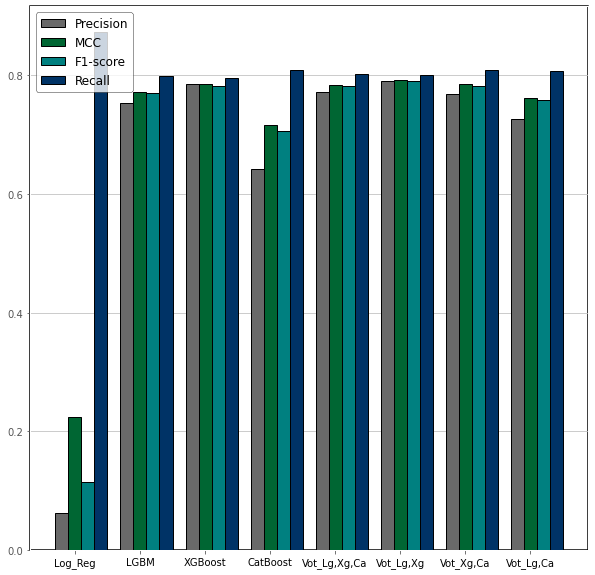

In [ ]:
from scipy import interp
import matplotlib.pyplot as plt

X = df.drop(['Class'] ,axis=1)
y = df['Class']
#colors=['#696969','#2E8B57','#DC143C', '#008080']
colors=['#696969','#006633','#008080','#003366' ]
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(10,10))
i=0
j=0 
x = np.arange(len(models)) 
xlim=[-0.05, 1.05]
ylim=[0.5, 1.05]
for model in models:
  cv = StratifiedKFold(n_splits=5)
  precision = []
  recall = []
  f1 = []
  MCC = []

  for train, test in cv.split(X, y):

      pred = model.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test])
      precision.append(precision_score(y.iloc[test], pred))
      recall.append(recall_score(y.iloc[test], pred)) 
      f1.append(f1_score(y.iloc[test], pred)) 
      MCC.append(matthews_corrcoef(y.iloc[test], pred)) 
      i+=1
  mean_precision = np.mean(precision) 
  mean_MCC = np.mean(MCC)
  mean_F1  = np.mean(f1)
  mean_recall = np.mean(recall)

  ax.bar(j-0.2, mean_precision,0.2, color=colors[0],  label='Precision',edgecolor="black", linewidth=1)
  ax.bar(j-0.2+0.2, mean_MCC,0.2, color=colors[1], label='MCC',edgecolor="black", linewidth=1)
  ax.bar(j-0.2+0.4, mean_F1,0.2, color=colors[2], label='F1',edgecolor="black", linewidth=1) 
  ax.bar(j-0.2+0.6,mean_recall ,0.2, color=colors[3], label ='Recall',edgecolor="black", linewidth=1)
  
  plt.xticks([0, 1, 2, 3, 4, 5, 6, 7],["Log_Reg","LGBM", "XGBoost", "CatBoost",
                                               "Vot_Lg,Xg,Ca", "Vot_Lg,Xg",
                                               "Vot_Xg,Ca", "Vot_Lg,Ca"], fontsize = 10, color = 'black')                                             
  ax.legend(['Precision', 'MCC', 'F1-score' , 'Recall'], loc='upper left',prop={'size': 12}, facecolor='white', edgecolor='black')
  ax.patch.set_facecolor('white')
  ax.yaxis.grid(True, color = '#C0C0C0')
  ax.patch.set_edgecolor('black')  
  ax.patch.set_linewidth('1.5')
  i=0
  j=j+1
 
plt.show()

#***AUC***

In [ ]:
models =[log_reg, lightgbm, xgboost, catboost, voting1, voting2, voting3, voting4]
names = ["Log_Reg","LGBM", "XGB", "CatBoost",
        "Vot_Lg,Xg,Ca", "Vot_Lg,Xg",
        "Vot_Xg,Ca", "Vot_Lg,Ca"] 

In [ ]:
colors = ['#ff1493','#8A2BE2', '#FFFF00', '#7FFFD4', '#8A2BE2','#800000', '#008B8B', '#FFFF00']

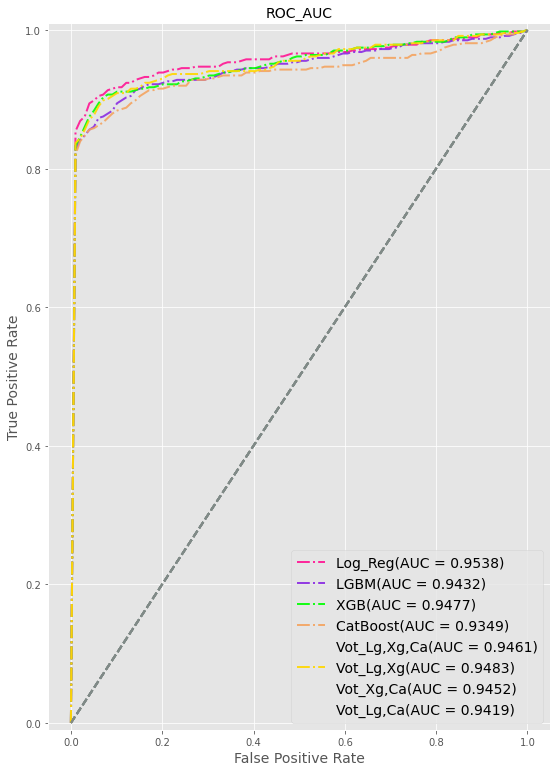

In [ ]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
X = df.drop(['Class'] ,axis=1)
y = df['Class']
f, axes = plt.subplots(ncols=1,nrows=1, figsize=(9,13))
linestyle=['-.','-.','-.','-.','','-.','','']
i=0
j=0
for model in models:
  cv = StratifiedKFold(n_splits=5)
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  for train, test in cv.split(X, y):

      probas_ = model.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
      fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:,1])
      tprs.append(interp(mean_fpr, fpr, tpr))
      tprs[-1][0] = 0.0
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      i+=1
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  axes.plot([0, 1], [0, 1], linestyle='--', lw=2, color='#808A87', alpha=.8)
  axes.plot(mean_fpr, mean_tpr, color=colors[j],
            label= r'%s(AUC = %0.4f)'% (names[j], mean_auc),
            linestyle=linestyle[j], lw=2, alpha=0.9)
  xlim=[-0.05, 1.05]
  ylim=[-0.05, 1.05] 
  axes.legend(loc="lower right", prop={'size': 14})  
  i=0
  j=j+1
plt.xlabel('False Positive Rate',fontsize=14)
plt.title('ROC_AUC', fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14) 
plt.ylim([-0.01,1.01])  
plt.show()           

In [ ]:
colors = ['#ff1493','#8A2BE2', '#00FF00','#F4A460', '#808000','#FFD700', '#800000', '#008B8B']

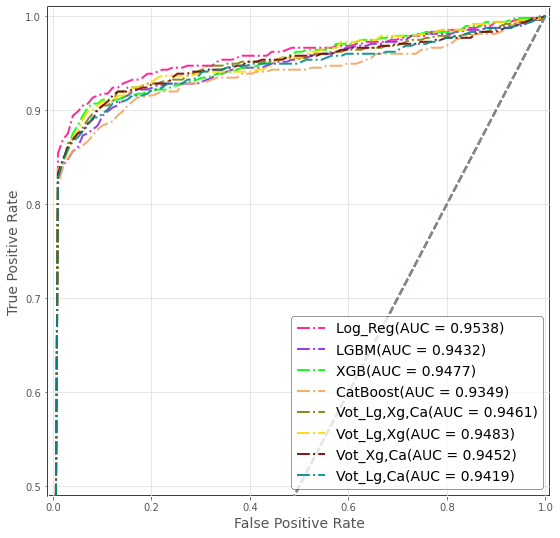

In [ ]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
X = df.drop(['Class'] ,axis=1)
y = df['Class']
f, axes = plt.subplots(ncols=1,nrows=1, figsize=(9,9))

i=0
j=0
for model in models:
  cv = StratifiedKFold(n_splits=5)
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  for train, test in cv.split(X, y):

      probas_ = model.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
      fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:,1])
      tprs.append(interp(mean_fpr, fpr, tpr))
      tprs[-1][0] = 0.0
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      i+=1
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  axes.plot([0, 1], [0, 1], linestyle='--', lw=2, color='#808A87', alpha=.8)
  axes.plot(mean_fpr, mean_tpr, color=colors[j],
            label= r'%s(AUC = %0.4f)'% (names[j], mean_auc),
            linestyle='-.', lw=2, alpha=0.9)
  xlim=[-0.05, 1.05]
  ylim=[-0.05, 1.05]
  axes.patch.set_facecolor('white')
  axes.grid(True, color = '#E0E0E0')
  axes.patch.set_edgecolor('black')  
  axes.patch.set_linewidth('1.5') 
  axes.legend(loc="lower right", prop={'size': 14}, facecolor = 'white', edgecolor='black')  
  i=0
  j=j+1
plt.xlabel('False Positive Rate',fontsize=14)
#plt.title('ROC_AUC', fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.xlim([-0.01,1.01])
plt.ylim([0.49,1.01])   
plt.show()

#***Precision_Recall***

In [ ]:
models =[log_reg, lightgbm, xgboost, catboost, voting1, voting2, voting3, voting4]
names = ["Log_Reg","LGBM", "XGB", "CatBoost",
        "Vot_Lg,Xg,Ca", "Vot_Lg,Xg",
        "Vot_Xg,Ca", "Vot_Lg,Ca"] 

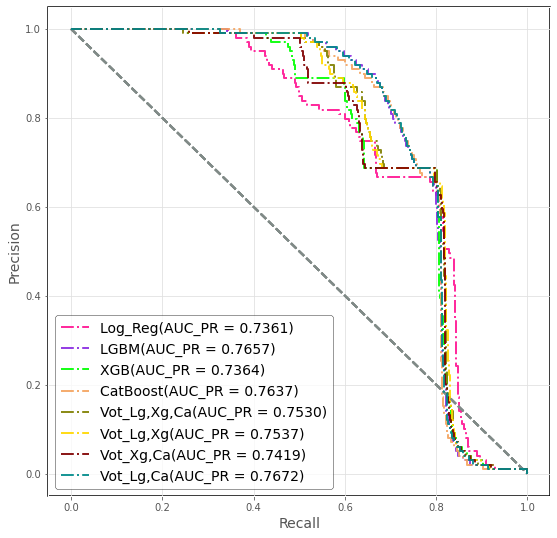

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve, auc
from scipy import interp
X = df.drop(['Class'] ,axis=1)
y = df['Class']
f, axes = plt.subplots(ncols=1,nrows=1, figsize=(9,9))
i=0
j=0
for model in models:
  cv = StratifiedKFold(n_splits=5)
    # defining the lists
  prs = []
  aucs = []
  mean_recall = np.linspace(0, 1, 100)
  for train, test in cv.split(X, y):

      probas_ = model.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
      # Compute PR curve and area the curve
      precision, recall, thresholds = precision_recall_curve(y[test], probas_[:, 1])
      prs.append(interp(mean_recall, precision, recall))
      pr_auc = auc(recall, precision)
      aucs.append(pr_auc)
      i+=1
  axes.plot([0, 1], [1, 0], linestyle='--', lw=2, color='#808A87', alpha=.8)
  mean_precision = np.mean(prs, axis=0)
  mean_auc = auc(mean_recall, mean_precision)
  axes.step(mean_precision, mean_recall,
             label=r'%s(AUC_PR = %0.4f)' % (names[j], mean_auc),
             linestyle='-.',lw=2, alpha=0.9 , color=colors[j])
             
  xlim=[-0.05, 1.05]
  ylim=[-0.05, 1.05]  
  axes.patch.set_facecolor('white')
  axes.grid(True, color = '#E0E0E0')
  axes.patch.set_edgecolor('black')  
  axes.patch.set_linewidth('1.5') 
  axes.legend(loc="lower left", prop={'size': 14}, facecolor = 'white', edgecolor='black')
  i=0
  j=j+1
#plt.title('AUC_Precision Recall Curve', fontsize=14)
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
 
plt.show()

# ***DeepLearning***

# ***x,y train, test data***

In [ ]:
train1, test1 = train_test_split(data, test_size = 0.2, random_state=42)
print("Train1 Shape: {} \nTest1 Shape: {}".format(train1.shape, test1.shape))

Train1 Shape: (226980, 32) 
Test1 Shape: (56746, 32)


###x,y train

In [ ]:
X_train1  = train1.drop('Class', axis=1).values
y_train1  = train1['Class'].values
print('\nX_train1  shape: {} \ny_train1 shape: {}'.format(X_train1.shape, y_train1.shape))


X_train1  shape: (226980, 31) 
y_train1 shape: (226980,)


In [ ]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train1  = robust_scaler.fit_transform(X_train1)

###X, y test

In [ ]:
X_test1  = test1.drop('Class', axis=1).values
y_test1  = test1['Class']
print('\nX_test1  shape: {} \ny_test1 shape: {}'.format(X_test1.shape, y_test1.shape))


X_test1  shape: (56746, 31) 
y_test1 shape: (56746,)


In [ ]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

X_test1 = rob_scaler.fit_transform(X_test1)

#***genarate model***

In [ ]:
def generate_model(batch_size, epochs, neuronPct):
   
    model = Sequential()
    neurons = int(neuronPct * 100)
    # So long as there would have been at least 20 neurons and fewer than 5layers, create a new layer. 
    layer = 0
    while  round(neurons)>20 and layer <5:
        # The first (0th) layer needs an input input_dim(neuronCount)
        if layer==0:  
           model.add(Dense(neurons,input_dim=31 , activation= 'relu', kernel_initializer='he_uniform'))
        else:
            model.add(Dense(neurons, activation='relu'))                

        layer += 1
        neurons = round((neurons +1)/2)

    model.add(Dense(1,activation='sigmoid')) # Output
    return model

In [ ]:
def keras_cv(batch_size, epochs, neuronPct):
    cv = StratifiedKFold(n_splits=5)
    num = 0
    for train, test in cv.split(X_train1, y_train1):
        num+=1
        # Split train and test
        x_train = X_train1[train]
        Y_train = y_train1[train]
        x_test = X_train1[test]
        Y_test = y_train1[test]
        model = generate_model(batch_size, epochs, neuronPct)
        opt = tf.keras.optimizers.Adam() #optimizer
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss")
        params_dl['batch_size'] = round(batch_size)
        params_dl['epochs'] = round(epochs)
        params_dl['neuronPct'] = neuronPct
        model.fit(x_train,Y_train,validation_split=0.1
                  ,class_weight={0:0.25, 1:148}
                  ,callbacks=[callback]
                  ,verbose=0,epochs=round(epochs), batch_size=round(batch_size))

        # Predict on the out of boot (validation)
        proba = model.predict(x_test)
        pred = (model.predict(x_test)> 0.5)
        score = metrics.log_loss(Y_test, pred)
    tensorflow.keras.backend.clear_session()
    return (-(np.mean(score)))

params_dl={'batch_size' : (1000,3500),
           'epochs' : (25,150),
           'neuronPct': (0.51, 1)
           }   

dlBO = BayesianOptimization(keras_cv, params_dl, verbose=2)
# verbose = 1 prints only when a maximum 
# is observed, verbose = 0 is silent
start = time.time()
dlBO.maximize(init_points=6, n_iter =10, acq='ei')

print('It takes %s minutes' % ((time.time() - start)/60))

params_dl = dlBO.max['params']
params_dl['epochs'] = round(params_dl['epochs'])
params_dl['batch_size'] = round(params_dl['batch_size'])
params_dl['neuronPct'] = round((params_dl['neuronPct']), 2)
print(params_dl)

|   iter    |  target   | batch_... |  epochs   | neuronPct |
-------------------------------------------------------------
|  1        | -0.8651   |  1.809e+0 |  121.8    |  0.5771   |
|  2        | -0.9267   |  1.341e+0 |  84.61    |  0.5109   |
|  3        | -0.6224   |  1.495e+0 |  90.3     |  0.9427   |
|  4        | -1.926    |  2.808e+0 |  128.1    |  0.9518   |
|  5        | -1.763    |  1.517e+0 |  55.41    |  0.5107   |
|  6        | -0.9252   |  2.213e+0 |  78.43    |  0.9365   |
|  7        | -2.414    |  2.211e+0 |  81.87    |  0.6905   |
|  8        | -0.8636   |  2.371e+0 |  28.25    |  0.8228   |
|  9        | -1.993    |  3.181e+0 |  120.4    |  0.9661   |
|  10       | -0.7647   |  3.315e+0 |  39.42    |  0.6542   |
|  11       | -1.135    |  2.17e+03 |  104.7    |  0.6396   |
|  12       | -1.061    |  2.776e+0 |  36.69    |  0.8304   |
|  13       | -1.171    |  2.085e+0 |  32.66    |  0.7278   |
|  14       | -0.4953   |  1.563e+0 |  117.4    |  0.8648   |
|  15   

#***model summury***

In [ ]:
model = generate_model(batch_size= 1563 ,epochs=117 ,neuronPct=0.86)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 86)                2752      
                                                                 
 dense_1 (Dense)             (None, 44)                3828      
                                                                 
 dense_2 (Dense)             (None, 22)                990       
                                                                 
 dense_3 (Dense)             (None, 1)                 23        
                                                                 
Total params: 7,593
Trainable params: 7,593
Non-trainable params: 0
_________________________________________________________________


#***result keras***

In [ ]:
opt = tf.keras.optimizers.Adam() #optimizer

model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(X_train1, y_train1, epochs =117 ,
                    batch_size=1563,validation_split = 0.1
                    ,class_weight={0:0.25, 1:148}  
                    ,verbose = 0)
history_dict = history.history     
y_prob = model.predict(X_test1)    
y_pred = (model.predict(X_test1)> 0.5).astype("int32")

In [ ]:
print(classification_report(y_test1 , y_pred))
print(confusion_matrix(y_test1 , y_pred))

# summary  
print('\n')
print('--------- Summary ------------')
print('\n')
print('accuracy: {}'.format(round(accuracy_score(y_test1, y_pred),4)))
print('Precision: {}'.format(round(precision_score(y_test1, y_pred),4)))
print('f1: {}'.format(round(metrics.f1_score(y_test1, y_pred),4)))
print('Recall: {}'.format(round(recall_score(y_test1, y_pred),4)))
print('AUC: {}'.format(round(roc_auc_score(y_test1, y_prob),4)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test1, y_prob),4)))
print('MCC: {}'.format((matthews_corrcoef(y_test1, y_pred))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.80      0.82      0.81        90

    accuracy                           1.00     56746
   macro avg       0.90      0.91      0.91     56746
weighted avg       1.00      1.00      1.00     56746

[[56638    18]
 [   16    74]]


--------- Summary ------------


accuracy: 0.9994
Precision: 0.8043
f1: 0.8132
Recall: 0.8222
AUC: 0.9401
Precision-Recall: 0.7922
MCC: 0.8129360313935904


#***diagram loss , accuracy train***

Text(0.5, 1.0, 'val_loss')

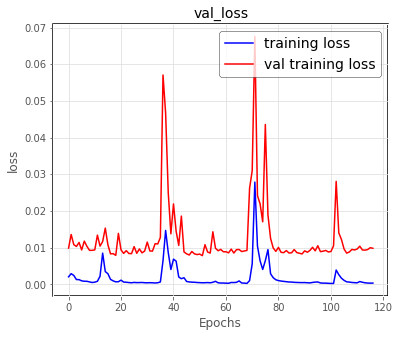

In [ ]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(6,5))
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
ax.patch.set_facecolor('white')
ax.grid(True, color = '#E0E0E0')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5') 
ax.legend(loc="upper right", prop={'size': 14}, facecolor = 'white', edgecolor='black')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title('val_loss', fontsize=14)

Text(0.5, 1.0, 'val_accuracy')

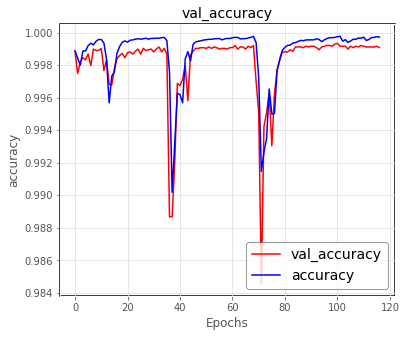

In [ ]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(6,5))
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
ax.patch.set_facecolor('white')
ax.grid(True, color = '#E0E0E0')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5') 
ax.legend(loc="lower right", prop={'size': 14}, facecolor = 'white', edgecolor='black')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title('val_accuracy', fontsize=14)

#***diagram roc_auc***

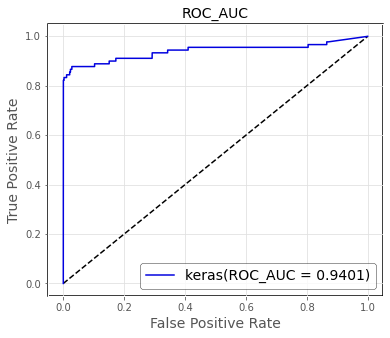

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, y_prob,pos_label=True)
from sklearn.metrics import auc
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(6,5))
auc = auc(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr,color = "#0101DF", label='keras(ROC_AUC = {:.4f})'.format(auc))
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC', fontsize=14) 
ax.patch.set_facecolor('white')
ax.grid(True, color = '#E0E0E0')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5') 
ax.legend(loc="lower right", prop={'size': 14}, facecolor = 'white', edgecolor='black')
plt.show()

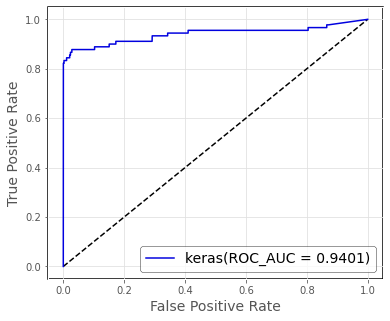

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, y_prob,pos_label=True)
from sklearn.metrics import auc
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(6,5))
auc = auc(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr,color = "#0101DF", label='keras(ROC_AUC = {:.4f})'.format(auc))
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
#plt.title('ROC_AUC', fontsize=14) 
ax.patch.set_facecolor('white')
ax.grid(True, color = '#E0E0E0')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5') 
ax.legend(loc="lower right", prop={'size': 14}, facecolor = 'white', edgecolor='black')
plt.show()

#***diagram precision recall***

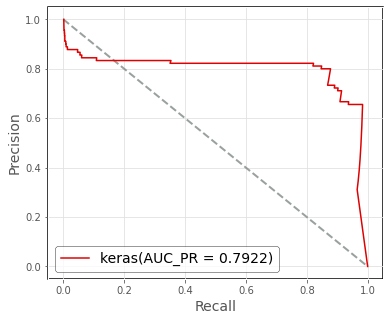

In [ ]:
from sklearn.metrics import precision_recall_curve
precision,recall, _ = precision_recall_curve(y_test1, y_prob)
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(6,5))
plt.plot([0, 1], [1, 0], linestyle='--', lw=2, color='#808A87', alpha=.8)
plt.plot(precision,recall,  color="#DF0101", label='keras(AUC_PR = {:.4f})'.format(round(average_precision_score(y_test1, y_prob),4)))
#plt.plot(precision,recall,  color="#DF0101", label='keras(AUC_PR)')
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
#plt.title('Precision-Recall curve',fontsize=14) 
ax.patch.set_facecolor('white')
ax.grid(True, color = '#E0E0E0')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5') 
ax.legend(loc="lower left", prop={'size': 14}, facecolor = 'white', edgecolor='black')
plt.show()